<a href="https://colab.research.google.com/github/IraAndreykiv/ML/blob/main/Lab4_ML(Andreykiv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

In [ ]:
def func(x):
    return x*x + 2*x + 1

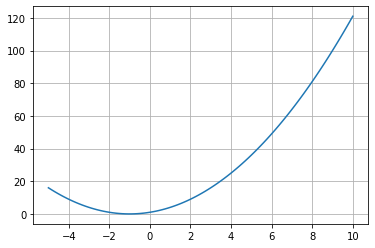

In [ ]:
x = np.linspace(-5, 10, 100)
plt.plot(x, func(x))
plt.grid(True)
plt.show()

In [ ]:
def pohidna(x, h):
    return (func(x+h) - func(x-h)) / (2 * h)

In [ ]:
def plotFunction():
    z = []
    b = []
    x = -5
    for i in range(100):
        x += 0.1
        y = func(x)
        z.append(x)
        b.append(y)
    plt.title("Графік функції")
    plt.plot(z, b)
    

In [ ]:
def gradient_iterations(x_start, iterations, step): # крок = швидкість навчання
    x_grad = [x_start] # список зі значеннями х для побудови графіків  
    y_grad = [func(x_start)] # список зі значеннями у для побудови графіків

    for i in range(iterations):
        # X1 = X0 - (step * dy/dx) 
        x_start_derivative = - derivative(func, x_start) # знаходимо похідну в точці -dy/dx
        x_start += (step * x_start_derivative) # похідну множимо на крок і додаємо до точки    
        x_grad.append(x_start)
        y_grad.append(func(x_start))

    print("Start point: ", x_grad[0])
    print("Local minimum occurs at: {:.3f}".format(x_start))
    print("Number of steps: ", len(x_grad) - 1)
    print("Step: ", step)
    plot_gradient(x, func(x), x_grad, y_grad)

    return x_start

In [ ]:
def plot_gradient(x, y, x_vis, y_vis): # функція для побудови двох графіків
    plt.scatter(x_vis, y_vis, c = "b") # точки градієнтного спуску
    plt.plot(x, func(x), c = "r") 
    plt.grid(True)
    plt.title("Gradient Descent")
    plt.show()

    plt.scatter(x_vis, y_vis, c = "b") 
    plt.plot(x, func(x), c = "r")
    plt.grid(True)
    plt.xlim([-5.0,-1.0]) # інтервал х на графіку
    plt.title("Zoomed in Gradient Descent")
    plt.show()

Start point:  -7.5
Local minimum occurs at: -2.934
Number of steps:  60
Step:  0.01


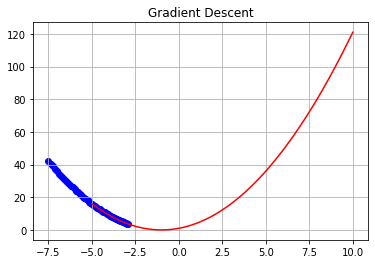

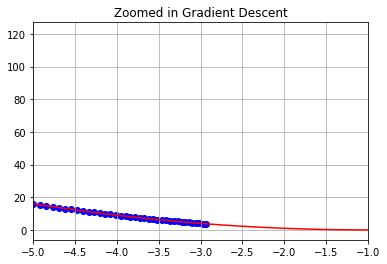

-2.9340954274987867

In [ ]:
start_point =  -7.5 #@param {type:"number"}
num_of_iterations = 60 #@param {type:"slider", min:0, max:500, step:10}
step = 0.01 #@param {type:"number"}
gradient_iterations(start_point, num_of_iterations, step)

In [ ]:
def grad(alpha, eps):
    x = 0
    h = 0.1
    for i in range(1, 1000):
        x_new = x - alpha * pohidna(x, h)
        y_new = func(x)
        if abs(x_new - x) <= eps:
            plt.scatter(x_new, y_new, color="r", label="Локальний мінімум")
            plt.legend()
            plt.show()
            print('Min', x_new, y_new)
            return x_new, y_new
        x = x_new
    plt.legend()
    plt.show()
    return x_new, y_new

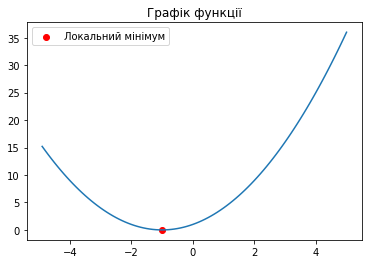

Min -0.9998984400433316 2.865117998407385e-08


(-0.9998984400433316, 2.865117998407385e-08)

In [ ]:
plotFunction()
grad(0.2, 0.0001)

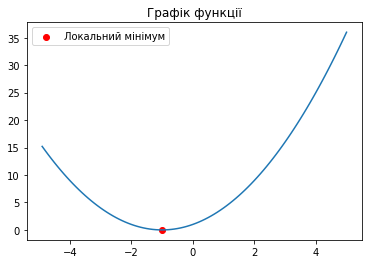

Min -0.9899223039999998 0.00028211099074559876


(-0.9899223039999998, 0.00028211099074559876)

In [ ]:
plotFunction()
grad(0.2, 0.01)

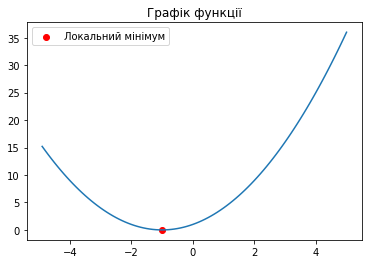

Min -1.0036279705600002 3.656158440068502e-05


(-1.0036279705600002, 3.656158440068502e-05)

In [ ]:
plotFunction()
grad(0.8, 0.01)

In [ ]:
import unittest
from scipy.misc import derivative


class TestNotebook(unittest.TestCase):
    
    def test_pohidna(self):
        self.assertAlmostEqual(pohidna(0, 0.1), 2)
    def test_pohidna2(self):
        self.assertAlmostEqual(derivative(func, 0, dx=1e-6), 2)
        

unittest.main(argv=[''], verbosity=2, exit=False)

test_pohidna (__main__.TestNotebook) ... ok
test_pohidna2 (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.006s

OK
